In [1]:
from IPython.display import IFrame
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Legend, BoxSelectTool, HoverTool
from bokeh.layouts import gridplot, column, row

output_notebook()

Loading BokehJS ...

## TOC

What this notebook covers:
- shapefiles, geojson, and geopandas
- geospatial-visualizations in bokeh and folium
- choropleth, heatmap, and heatmap with time

## Shapefiles and geojson

The two most used format to distribute geospatial data are shapefile and GeoJSON. Shapefile is a standard defined by Esri almost 30 years ago, whereas geojson was introduced about 10 years ago by a community of GIS (Geographic Information System) developers.

Shapefile is actually not a single file, but a collection of files and, internally, it uses a binary format for encoding the geometries (WKB). In the shapefile representation, 3 files are required:

1. the `.shp` file, which contains the feature geometry
2. the `.shx` file, which is the index of the feature geometry
3. the `.dbf` file, which provides properties attached to the various shapes (like name, id, etc.)

GeoJSON is a subset of JSON which was created to provide a specification for encoding geospatial data while remaining decodable by any JSON decoder, so web-friendly.

In [2]:
IFrame(src='https://en.wikipedia.org/wiki/Shapefile', width=800, height=600)

## Geopandas

Python and jupyter supports geospatial data with a number of libraries. One of particular interest is GeoPandas, which extends Pandas dataframes to enable spatial operations on geometric types. These operations are in turn performed behind the scene by another library called `shapely`, which is a Python package to manipulate and analyze planar geometric objects.

GeoPandas supports reading and writing shapefiles and geojson out of the box.

Let's look at a couple of examples. In the first one we load a geojson which includes boroughs of NYC.

In [3]:
import geopandas as gpd

gpd.read_file("nyc-boroughs.geojson")

boroughCode        borough  \
0              5  Staten Island   
1              5  Staten Island   
2              5  Staten Island   
3              5  Staten Island   
4              4         Queens   
..           ...            ...   
99             2          Bronx   
100            2          Bronx   
101            2          Bronx   
102            2          Bronx   
103            2          Bronx   

                                                   @id  \
0    http://nyc.pediacities.com/Resource/Borough/St...   
1    http://nyc.pediacities.com/Resource/Borough/St...   
2    http://nyc.pediacities.com/Resource/Borough/St...   
3    http://nyc.pediacities.com/Resource/Borough/St...   
4    http://nyc.pediacities.com/Resource/Borough/Qu...   
..                                                 ...   
99   http://nyc.pediacities.com/Resource/Borough/Bronx   
100  http://nyc.pediacities.com/Resource/Borough/Bronx   
101  http://nyc.pediacities.com/Resource/Borough/Bronx   
102  http://nyc.pediacities.com/Resource/Borough/Bronx   
103  http://nyc.pediacities.com/Resource/Borough/Bronx   

                                              geometry  
0    POLYGON ((-74.05051 40.56642, -74.04998 40.566...  
1    POLYGON ((-74.05314 40.57770, -74.05406 40.577...  
2    POLYGON ((-74.15946 40.64145, -74.15998 40.641...  
3    POLYGON ((-74.08221 40.64828, -74.08142 40.648...  
4    POLYGON ((-73.83668 40.59495, -73.83671 40.594...  
..                                                 ...  
99   POLYGON ((-73.78103 40.87648, -73.78121 40.876...  
100  POLYGON ((-73.78651 40.88094, -73.78582 40.880...  
101  POLYGON ((-73.87295 40.90444, -73.85947 40.900...  
102  POLYGON ((-73.80518 40.81527, -73.80508 40.815...  
103  POLYGON ((-73.80408 40.81349, -73.80424 40.813...  

[104 rows x 4 columns]

In the second example we use the shapefile of the districts of Lugano, which can be found on the website of  [Statistica Urbana città di Lugano](https://statistica.lugano.ch/site/ogd-demografia/)

In [4]:
IFrame(src='https://statistica.lugano.ch/site/ogd-demografia/', width=800, height=600)

In [5]:
districts = gpd.read_file("shapeFilesQuartieri/quartieri.shp")
districts

OBJECTID  QUART_ID       NomeQuarti    Shape_Leng    Shape_Area  \
0          1         1         Aldesago   3603.794516  3.032742e+05   
1          2         2            Besso   3935.589985  6.466013e+05   
2          3         3              Brè   9230.906731  3.895095e+06   
3          4         4       Breganzona   7100.286545  2.276976e+06   
4          5         5        Cassarate   3614.404506  4.050159e+05   
5          6         6       Castagnola   5340.207854  1.015444e+06   
6          7         7           Centro   5834.471905  1.029662e+06   
7          8         8         Cureggia   4114.676617  6.599055e+05   
8          9         9  Davesco-Soragno   7753.277678  2.498038e+06   
9         10        10          Gandria   6776.025091  1.313985e+06   
10        11        11           Loreto   4904.565485  5.934519e+05   
11        12        12     Molino Nuovo   5968.731394  1.228950e+06   
12        13        13   Pambio-Noranco   4188.059750  5.469093e+05   
13        14        14         Pazzallo   8252.352743  1.615837e+06   
14        15        15       Pregassona   8474.421342  2.257637e+06   
15        16        16        Viganello   5878.248177  1.200570e+06   
16        17        17         Barbengo  10700.936797  2.620760e+06   
17        18        18         Carabbia   6515.490488  1.074064e+06   
18        19        19   Villa Luganese   7577.763665  2.206881e+06   
19        20        20            Bogno   9876.005174  4.231893e+06   
20        21        21            Cadro  11477.113990  4.556138e+06   
21        22        22           Carona  13802.639500  4.693351e+06   
22        23        23          Certara   7996.802207  2.721703e+06   
23        24        24         Cimadera  13102.339165  5.243646e+06   
24        25        25          Sonvico  18007.034380  1.106185e+07   
25        26        26         Valcolla  17864.665526  1.133502e+07   
26        27       106          Caprino   8686.365614  2.554852e+06   
27        28       110          Cantine   7174.319910  2.079552e+06   

                                             geometry  
0   POLYGON ((719605.608 97032.549, 719616.018 969...  
1   POLYGON ((716238.081 96434.664, 716243.957 964...  
2   POLYGON ((721585.079 98659.683, 721643.110 985...  
3   POLYGON ((715597.415 97308.572, 715601.931 973...  
4   POLYGON ((718080.505 96486.760, 718117.419 964...  
5   POLYGON ((718704.935 96441.934, 718709.423 964...  
6   POLYGON ((717133.371 96838.780, 717133.401 968...  
7   POLYGON ((719621.031 98106.056, 719657.892 980...  
8   POLYGON ((718954.610 99849.545, 718979.545 998...  
9   POLYGON ((722243.052 97822.844, 722249.959 978...  
10  POLYGON ((716511.102 95522.876, 716522.723 955...  
11  POLYGON ((718099.401 97894.970, 718097.493 978...  
12  POLYGON ((716269.389 94200.194, 716301.410 941...  
13  POLYGON ((716391.088 94089.615, 716394.696 940...  
14  POLYGON ((718746.423 98757.412, 718771.826 987...  
15  POLYGON ((718861.580 97316.030, 718887.636 973...  
16  POLYGON ((715252.035 91266.516, 715251.972 912...  
17  POLYGON ((716386.406 93233.987, 716407.065 932...  
18  POLYGON ((721105.626 101935.007, 721148.680 10...  
19  POLYGON ((727278.613 106403.884, 727459.449 10...  
20  POLYGON ((719950.040 101230.194, 719966.663 10...  
21  POLYGON ((716555.699 92969.864, 716577.792 929...  
22  POLYGON ((724878.260 105364.620, 724887.806 10...  
23  POLYGON ((724314.168 104718.989, 724309.134 10...  
24  POLYGON ((722231.633 104341.533, 722274.122 10...  
25  POLYGON ((725971.900 106308.466, 725966.515 10...  
26  POLYGON ((721071.330 94539.240, 721191.826 941...  
27  POLYGON ((722868.508 95599.849, 722880.745 955...

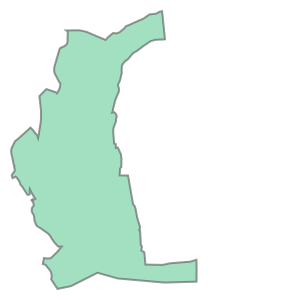

In [6]:
districts.loc[0].geometry

In [7]:
districts2 = districts.set_index("NomeQuarti")

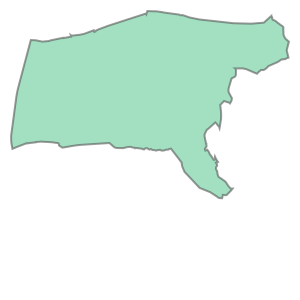

In [8]:
districts2.loc["Viganello"].geometry

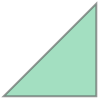

In [9]:
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (1, 1), (1, 0)])

polygon

In [10]:
districts_json = districts[["geometry", "NomeQuarti"]].to_json()
districts_json[:1000]

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"NomeQuarti": "Aldesago"}, "geometry": {"type": "Polygon", "coordinates": [[[719605.6079999991, 97032.54890000075], [719616.0179999992, 96931.4290000014], [719613.7899999991, 96931.57699999958], [719609.2410000004, 96930.69189999998], [719602.0910999998, 96930.49289999902], [719596.7470000014, 96930.50989999995], [719590.5168999992, 96930.02589999884], [719579.8790999986, 96929.1708999984], [719564.6680999994, 96924.80900000036], [719559.0958999991, 96921.0540000014], [719540.7551000006, 96908.89600000158], [719527.4569000006, 96898.81920000166], [719521.0480000004, 96893.96290000156], [719514.3359999992, 96889.13309999928], [719502.1391000003, 96882.17990000173], [719498.1559999995, 96877.78000000119], [719481.5579999983, 96858.13300000131], [719476.6871000007, 96855.84090000018], [719466.6409000009, 96845.91789999977], [719461.7100000009, 96837.0260999985], [719460.6270999983, 96821.76099999994]

In [11]:
with open('nyc-boroughs.geojson') as f:
    nyc_geojson = json.load(f)
nyc_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 0,
   'properties': {'boroughCode': 5,
    'borough': 'Staten Island',
    '@id': 'http://nyc.pediacities.com/Resource/Borough/Staten_Island'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.05050806403247, 40.566422034160816],
      [-74.04998352562575, 40.56639592492827],
      [-74.04931640362088, 40.56588774778044],
      [-74.04923629842045, 40.5653627363681],
      [-74.05002620158643, 40.565318180621134],
      [-74.05090601705089, 40.5660943421306],
      [-74.05067916748614, 40.5663108457364],
      [-74.05107159803778, 40.5667224933978],
      [-74.05050806403247, 40.566422034160816]]]}},
  {'type': 'Feature',
   'id': 1,
   'properties': {'boroughCode': 5,
    'borough': 'Staten Island',
    '@id': 'http://nyc.pediacities.com/Resource/Borough/Staten_Island'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.05314036821109, 40.577702715545755],
      [-74.05406044939875, 40.5771

## Choropleth map in bokeh

Let's start by rendering the district polygons that we have in the geopandas dataframe (from the shapefile). To work with geospatial data bokeh uses a GeoJSONDataSource, which takes as input geojson data. Thus, in case we have the geospatial data in a geopandas dataframe or in a shapefile, we need to convert it to geojson.

To render the various polygons we use the Patches glyph in bokeh.

In [12]:
from bokeh.models import GeoJSONDataSource


p = figure(title = 'Lugano districts', 
           frame_height = 600 ,
           frame_width = 600, 
           toolbar_location = 'below',
           tools = "pan, box_zoom, reset")

geo_ds = GeoJSONDataSource(geojson=districts_json)
plotted_districts = p.patches('xs','ys', source = geo_ds,
                   line_color = 'black', 
                   line_width = 0.25)

p.add_tools(HoverTool(renderers = [plotted_districts],
                      tooltips = [("District","@NomeQuarti")]))

show(p)

Now that we have the map of the districts, we want to create a choropleth, mapping the number of residents on the color of the district. We can get the residents data from the same website (Statistica Urbana Lugano).

In [13]:
residents = pd.read_json("q_quartieri_4_2019.json")
residents

Quartiere       Quartierenome  TotaleAbitantiPrev  TotaleAbitantiCurr
0           1            Aldesago               695.0               654.0
1          17            Barbengo              2345.0              2338.0
2           2               Besso              5143.0              5132.0
3          20               Bogno               205.0               215.0
4           3                 Brè               428.0               413.0
5           4          Breganzona              5404.0              5352.0
6          21               Cadro              2685.0              2678.0
7          18            Carabbia               632.0               615.0
8          22              Carona               932.0               916.0
9           5           Cassarate              3724.0              3673.0
10          6          Castagnola              2453.0              2449.0
11        106  Castagnola Caprino                82.0                80.0
12          7              Centro              5412.0              5304.0
13         23             Certara               101.0                94.0
14         24            Cimadera               204.0               187.0
15          8            Cureggia               183.0               171.0
16          9     Davesco-Soragno              1615.0              1598.0
17         10             Gandria               279.0               275.0
18        110     Gandria Cantine                 NaN                 NaN
19         11              Loreto              3222.0              3187.0
20         12        Molino Nuovo              9648.0              9630.0
21         13      Pambio-Noranco               755.0               743.0
22         14            Pazzallo              1516.0              1511.0
23         15          Pregassona              9336.0              9354.0
24         25             Sonvico              2090.0              2087.0
25         26            Valcolla               819.0               816.0
26         16           Viganello              7169.0              7040.0
27         19      Villa Luganese               570.0               570.0

In [14]:
districts_residents = districts.merge(residents, left_on="QUART_ID", right_on="Quartiere", how="left")
districts_residents

OBJECTID  QUART_ID       NomeQuarti    Shape_Leng    Shape_Area  \
0          1         1         Aldesago   3603.794516  3.032742e+05   
1          2         2            Besso   3935.589985  6.466013e+05   
2          3         3              Brè   9230.906731  3.895095e+06   
3          4         4       Breganzona   7100.286545  2.276976e+06   
4          5         5        Cassarate   3614.404506  4.050159e+05   
5          6         6       Castagnola   5340.207854  1.015444e+06   
6          7         7           Centro   5834.471905  1.029662e+06   
7          8         8         Cureggia   4114.676617  6.599055e+05   
8          9         9  Davesco-Soragno   7753.277678  2.498038e+06   
9         10        10          Gandria   6776.025091  1.313985e+06   
10        11        11           Loreto   4904.565485  5.934519e+05   
11        12        12     Molino Nuovo   5968.731394  1.228950e+06   
12        13        13   Pambio-Noranco   4188.059750  5.469093e+05   
13        14        14         Pazzallo   8252.352743  1.615837e+06   
14        15        15       Pregassona   8474.421342  2.257637e+06   
15        16        16        Viganello   5878.248177  1.200570e+06   
16        17        17         Barbengo  10700.936797  2.620760e+06   
17        18        18         Carabbia   6515.490488  1.074064e+06   
18        19        19   Villa Luganese   7577.763665  2.206881e+06   
19        20        20            Bogno   9876.005174  4.231893e+06   
20        21        21            Cadro  11477.113990  4.556138e+06   
21        22        22           Carona  13802.639500  4.693351e+06   
22        23        23          Certara   7996.802207  2.721703e+06   
23        24        24         Cimadera  13102.339165  5.243646e+06   
24        25        25          Sonvico  18007.034380  1.106185e+07   
25        26        26         Valcolla  17864.665526  1.133502e+07   
26        27       106          Caprino   8686.365614  2.554852e+06   
27        28       110          Cantine   7174.319910  2.079552e+06   

                                             geometry  Quartiere  \
0   POLYGON ((719605.608 97032.549, 719616.018 969...          1   
1   POLYGON ((716238.081 96434.664, 716243.957 964...          2   
2   POLYGON ((721585.079 98659.683, 721643.110 985...          3   
3   POLYGON ((715597.415 97308.572, 715601.931 973...          4   
4   POLYGON ((718080.505 96486.760, 718117.419 964...          5   
5   POLYGON ((718704.935 96441.934, 718709.423 964...          6   
6   POLYGON ((717133.371 96838.780, 717133.401 968...          7   
7   POLYGON ((719621.031 98106.056, 719657.892 980...          8   
8   POLYGON ((718954.610 99849.545, 718979.545 998...          9   
9   POLYGON ((722243.052 97822.844, 722249.959 978...         10   
10  POLYGON ((716511.102 95522.876, 716522.723 955...         11   
11  POLYGON ((718099.401 97894.970, 718097.493 978...         12   
12  POLYGON ((716269.389 94200.194, 716301.410 941...         13   
13  POLYGON ((716391.088 94089.615, 716394.696 940...         14   
14  POLYGON ((718746.423 98757.412, 718771.826 987...         15   
15  POLYGON ((718861.580 97316.030, 718887.636 973...         16   
16  POLYGON ((715252.035 91266.516, 715251.972 912...         17   
17  POLYGON ((716386.406 93233.987, 716407.065 932...         18   
18  POLYGON ((721105.626 101935.007, 721148.680 10...         19   
19  POLYGON ((727278.613 106403.884, 727459.449 10...         20   
20  POLYGON ((719950.040 101230.194, 719966.663 10...         21   
21  POLYGON ((716555.699 92969.864, 716577.792 929...         22   
22  POLYGON ((724878.260 105364.620, 724887.806 10...         23   
23  POLYGON ((724314.168 104718.989, 724309.134 10...         24   
24  POLYGON ((722231.633 104341.533, 722274.122 10...         25   
25  POLYGON ((725971.900 106308.466, 725966.515 10...         26   
26  POLYGON ((721071.330 94539.240, 721191.826 941...        106   
27  POLYGON ((722868.508 95599.849, 7228

To map the number of residents on the color in bokeh, we use a LinearColorMapper.

We will also create a ColorBar which acts as legend.

In [15]:
from bokeh.palettes import Reds
from bokeh.models import LinearColorMapper, ColorBar

districts_residents_json = districts_residents[["NomeQuarti", "TotaleAbitantiCurr", "geometry"]].to_json()
geo_ds = GeoJSONDataSource(geojson=districts_residents_json)

palette = Reds[9]
palette = palette[::-1]

max_residents = districts_residents["TotaleAbitantiCurr"].max()
min_residents = districts_residents["TotaleAbitantiCurr"].min()

color_mapper = LinearColorMapper(palette = palette, low = min_residents, high = max_residents)

color_bar = ColorBar(color_mapper = color_mapper, 
                     width = 20, height = 500,
                     label_standoff = 8,
                     location = (0,0))
    
p = figure(title = "Residents per district in Lugano - Choropleth map", 
           height = 600, width = 600, 
           toolbar_location = "below",
           tools = "pan, box_zoom, reset")

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

plotted_countries = p.patches("xs","ys", source = geo_ds,
                   fill_color = {"field" : "TotaleAbitantiCurr",
                                 "transform" : color_mapper},
                   line_color = "gray", 
                   line_width = 0.25, 
                   fill_alpha = 1)

p.add_tools(HoverTool(renderers = [plotted_countries],
                      tooltips = [("District","@NomeQuarti"),
                               ("Number of residents", "@TotaleAbitantiCurr{0,0}")]))

p.add_layout(color_bar, "right")
show(p)

The color bar like this is not very useful, based on the principles we discussed in class. Let's adjust it my using less values and meaningful subdivision.

In [16]:
print(districts_residents.TotaleAbitantiCurr.min())
print(districts_residents.TotaleAbitantiCurr.max())

80.0
9630.0


In [17]:
from bokeh.palettes import Reds
from bokeh.models import LinearColorMapper, LogColorMapper, ColorBar

districts_residents_json = districts_residents[["NomeQuarti", "TotaleAbitantiCurr", "geometry"]].to_json()
geo_ds = GeoJSONDataSource(geojson=districts_residents_json)

palette = Reds[5]
palette = palette[::-1]

max_residents = 10000
min_residents = 0

color_mapper = LinearColorMapper(palette = palette, low = min_residents, high = max_residents)

color_bar = ColorBar(color_mapper = color_mapper, 
                     width = 20, height = 500,
                     label_standoff = 8,
                     location = (0,0))
    
p = figure(title = "Residents per district in Lugano - Choropleth map", 
           height = 600, width = 600, 
           toolbar_location = "below",
           tools = "pan, box_zoom, reset")

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

plotted_countries = p.patches("xs","ys", source = geo_ds,
                   fill_color = {"field" : "TotaleAbitantiCurr",
                                 "transform" : color_mapper},
                   line_color = "gray", 
                   line_width = 0.25, 
                   fill_alpha = 1)

p.add_tools(HoverTool(renderers = [plotted_countries],
                      tooltips = [("District","@NomeQuarti"),
                               ("Number of residents", "@TotaleAbitantiCurr")]))

p.add_layout(color_bar, "right")
show(p)

## Geospatial visualization in bokeh

So far we have seen how to render polygons that we imported from a shapefile or a geojson, without using geographical maps and the corresponding coordinates. 

We will now see how to render maps in bokeh, using the mercator projection. Bokeh, as all map libraries, supports different tiles provider, as for example:
- [CartoDB](https://carto.com/location-data-services/basemaps/)
- [Stamen](http://maps.stamen.com/#toner/12/37.7706/-122.3782)


In [18]:
import xyzservices.providers as xyz

# xyz.Stadia.StamenTerrain
# xyz.Stadia.StamenToner
# STAMEN_TONER

p = figure(x_range=(980000, 1000000), y_range=(5750000, 5800000),
           height = 600, width = 750,
           # tools = "pan, box_zoom, reset",
           x_axis_type="mercator", y_axis_type="mercator")

p.add_tile("CartoDB Positron", retina=True)

show(p)

With a geographical map, we can render geocoded data directly on the map. As discussed in class, we cannot use 2D position to map quantitative values, but instead we have to adopt size and color intensity.

To start, let's see how to render a circle at given coordinates, as for example this one in Lugano: 
- lat = 46.003822
- lon = 8.955392

To render at this coordinates on a bokeh map, we first need to convert the coordinates. Then we can simply put a circle glyph at the converted coordinates.

In [19]:
# WGS = World Geodetic System -- 84 is the last version
def wgs84_to_web_mercator_lon(lon):
    k = 6378137
    return lon * (k * np.pi/180.0)

def wgs84_to_web_mercator_lat(lat):
    k = 6378137
    return np.log(np.tan((90 + lat) * np.pi/360.0)) * k


lon = 8.961044
lat = 46.011382


x = wgs84_to_web_mercator_lon(lon)
y = wgs84_to_web_mercator_lat(lat)

p = figure(x_range=(-1000000, 2000000), y_range=(5000000, 5800000),
           height = 600, width = 750, 
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile("CartoDB Positron")

p.scatter(x=x, y=y, fill_color='orange', size=10)

show(p)

## Visualizing earthquakes on a bokeh map

Now that we know how to visualize geocoded data in a bokeh map, let's create a visualization of earthquakes.

In [20]:
earthquakes = pd.read_csv("earthquakes.csv")
earthquakes

Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0             MW  ...   
1              NaN                     NaN        5.8             MW  ...   
2              NaN                     NaN        6.2             MW  ...   
3              NaN                     NaN        5.8             MW  ...   
4              NaN                     NaN        5.8             MW  ...   
...            ...                     ...        ...            ...  ...   
23407          1.2                    40.0        5.6             ML  ...   
23408          2.0                    33.0        5.5             ML  ...   
23409          1.8                     NaN        5.9            MWW  ...   
23410          1.8                     NaN        6.3            MWW  ...   
23411          2.2                     NaN        5.5             MB  ...   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                             NaN            NaN                  NaN   
1                             NaN            NaN                  NaN   
2                             NaN            NaN                  NaN   
3                             NaN            NaN                  NaN   
4                             NaN            NaN                  NaN   
...                           ...            ...                  ...   
23407                        18.0          42.47                0.120   
23408                        18.0          48.58                0.129   
23409                         NaN          91.00                0.992   
23410                         NaN          26.00                3.553   
23411                       428.0          97.00                0.681   

       Horizontal Error  Root Mean Square            ID  Source  \
0                   NaN               NaN  ISCGEM860706  ISCGEM   
1                   NaN               NaN  ISCGEM860737  ISCGEM   
2                   NaN               NaN  ISCGEM860762  ISCGEM   
3                   NaN               NaN  ISCGEM860856  ISCGEM   
4                   NaN               NaN  ISCGEM860890  ISCGEM   
...                 ...               ...           ...     ...   
23407               NaN            0.1898    NN00570710      NN   
23408               NaN            0.2187    NN00570744      NN   
23409               4.8            1.5200    US10007NAF      US   
23410               6.0            1.4300    US10007NL0      US   
23411               4.5            0.9100    US10007NTD      US   

      Location Source Magnitude Source     Status  
0              ISCGEM           ISCGEM  Automatic  
1              ISCGEM           ISCGEM  Automatic  
2              ISCGEM           ISCGEM  Automatic  
3              ISCGEM           ISCGEM  Automatic  
4              ISCGEM           ISCGEM  Automatic  
...               ...              ...        ...  
23407              NN               NN   Reviewed  
23408              NN               NN   Reviewed  
23409              US               US   Reviewed  
23410              US

In [21]:
earthquakes["x"] = wgs84_to_web_mercator_lon(earthquakes.Longitude)
earthquakes["y"] = wgs84_to_web_mercator_lat(earthquakes.Latitude)

earthquakes

Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0             MW  ...   
1              NaN                     NaN        5.8             MW  ...   
2              NaN                     NaN        6.2             MW  ...   
3              NaN                     NaN        5.8             MW  ...   
4              NaN                     NaN        5.8             MW  ...   
...            ...                     ...        ...            ...  ...   
23407          1.2                    40.0        5.6             ML  ...   
23408          2.0                    33.0        5.5             ML  ...   
23409          1.8                     NaN        5.9            MWW  ...   
23410          1.8                     NaN        6.3            MWW  ...   
23411          2.2                     NaN        5.5             MB  ...   

       Horizontal Distance  Horizontal Error  Root Mean Square            ID  \
0                      NaN               NaN               NaN  ISCGEM860706   
1                      NaN               NaN               NaN  ISCGEM860737   
2                      NaN               NaN               NaN  ISCGEM860762   
3                      NaN               NaN               NaN  ISCGEM860856   
4                      NaN               NaN               NaN  ISCGEM860890   
...                    ...               ...               ...           ...   
23407                0.120               NaN            0.1898    NN00570710   
23408                0.129               NaN            0.2187    NN00570744   
23409                0.992               4.8            1.5200    US10007NAF   
23410                3.553               6.0            1.4300    US10007NL0   
23411                0.681               4.5            0.9100    US10007NTD   

       Source  Location Source Magnitude Source     Status             x  \
0      ISCGEM           ISCGEM           ISCGEM  Automatic  1.620990e+07   
1      ISCGEM           ISCGEM           ISCGEM  Automatic  1.417676e+07   
2      ISCGEM           ISCGEM           ISCGEM  Automatic -1.936647e+07   
3      ISCGEM           ISCGEM           ISCGEM  Automatic -2.622353e+06   
4      ISCGEM           ISCGEM           ISCGEM  Automatic  1.407379e+07   
...       ...              ...              ...        ...           ...   
23407      NN               NN               NN   Reviewed -1.323523e+07   
23408      NN               NN               NN   Reviewed -1.323541e+07   
23409      US               US               US   Reviewed  1.563217e+07   
23410      US               US               US   Reviewed  1.320960e+07   
23411      US               US               US   Reviewed  1.574172e+07   

                  y  
0      2.183920e+06  
1      2.074248e+05  
2     -2.341749e+06  
3     -8.196832e+06  
4      1.338653e+06  
...             ...  
23407  4.634909e+06  
23408  4.632920e+06  
23409  4.427669e+06  
23410 -1.009211e+06  
23411  4.494631e+06  

[23412 rows x 23 columns]

In [22]:
cds = ColumnDataSource(earthquakes[-5000:])

p = figure(x_range=(-2150000, 18000000), y_range=(-5300000, 11000000),
           height = 600, width = 750,            
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile("CartoDB Positron")

p.scatter(x='x', y='y', source=cds, line_color=None, fill_color='orange', alpha=0.5, size=3)

show(p)

Now we want to map the magnitude of the earthquake on the size of the corresponding circle. To do that, we use a LinearInterpolator, which maps an input range (earthquake magnitude in our case) to an output range (the size of the corresponding circle).

Then we will use the LinearInterpolator as a transformation on the circle glyph.

In [24]:
from bokeh.models import LinearInterpolator

cds = ColumnDataSource(earthquakes[-5000:])

size_mapper=LinearInterpolator(
        x=[earthquakes.Magnitude.min(), earthquakes.Magnitude.max()],
        y=[5,25]
)

TOOLTIPS = [
    ("Date", "@Date"),
    ("Magnitude", "@Magnitude"),
    ("Depth", "@Depth")
]

p = figure(x_range=(-2150000, 18000000), y_range=(-5300000, 11000000),
           height = 600, width = 750, 
           x_axis_type="mercator", y_axis_type="mercator", tooltips=TOOLTIPS)
p.add_tile("CartoDB Positron")

p.scatter(x='x', y='y', source=cds, fill_color='orange', line_color=None, alpha=0.5,
        size={'field':'Magnitude','transform': size_mapper})


show(p)


Bokeh also supports google maps, but for that you need a gcloud API key.

# Folium

What is Folium? Essentially Folium is the [leaflet](https://leafletjs.com/) map for python.

https://python-visualization.github.io/folium/


Folium is easy to use and supports a number of functionalities out of the box (e.g., choropleth, heatmap, etc), as well as multiple tile providers. Latitude/Longitude coordinates don't need to be converted.

Let's render a simple map using a tile provider. This time our focus will be the city of New York.

A list of open tile providers for leaflet can be found here: http://leaflet-extras.github.io/leaflet-providers/preview/

In [25]:
import folium


m = folium.Map(
    location=[40.693943, -73.985880],
    zoom_start=10,
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='ArcGIS')

m

Now we will use a dataset with geocoded Uber pickups and, to start, we want to render a pin for every trip in the first 100 in the dataset.

In [26]:
uber_trips_df = pd.read_csv("uber-raw-data-apr14.csv")
print(uber_trips_df.dtypes)
uber_trips_df

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object


Date/Time      Lat      Lon    Base
0         4/1/2014 0:11:00  40.7690 -73.9549  B02512
1         4/1/2014 0:17:00  40.7267 -74.0345  B02512
2         4/1/2014 0:21:00  40.7316 -73.9873  B02512
3         4/1/2014 0:28:00  40.7588 -73.9776  B02512
4         4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]

We want to parse the dates as well.

In [27]:
uber_trips_df = pd.read_csv("uber-raw-data-apr14.csv", parse_dates=['Date/Time'])
print(uber_trips_df.dtypes)
uber_trips_df

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object


Date/Time      Lat      Lon    Base
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]

In [28]:
some_trips_df = uber_trips_df.loc[:100]

In [29]:
m = folium.Map(location=[40.693943, -73.985880], zoom_start=10)

for index, row in some_trips_df.iterrows():
    folium.Marker([row['Lat'], row['Lon']],
                        radius=15,
                        tooltip=row['Date/Time'],
                       ).add_to(m)
    
m

Instead of pins we could also render circle markers.

In [30]:
from folium.plugins import MiniMap

m = folium.Map(
    location=[40.693943, -73.985880],
    zoom_start=10)

for index, row in some_trips_df.iterrows():
    folium.CircleMarker([row['Lat'], row['Lon']], 
                        radius=5, 
                        fill=True,
                        fill_opacity=0.7,
                        stroke=False
                       ).add_to(m)
    
m.add_child(MiniMap())
    
m

When we have many trips, rendering all of them as individual pins/circles does not help understanding the data. What we'd like to see in the visualization is how trips are distributed spatially in NYC - which are the areas where most trips are happening?

To answer this question we can use a Folium feature called MarkerCluster, which automatically and dynamically cluster points close in space together.

In [31]:
from folium.plugins import MarkerCluster

m = folium.Map(
    location=[40.693943, -73.985880],
    zoom_start=10,
    tiles='CartoDB dark_matter')

marker_cluster = MarkerCluster().add_to(m)

for index, row in some_trips_df.iterrows():
    folium.CircleMarker([row['Lat'], row['Lon']], 
                        radius=5, 
                        fill=False,
                        fill_opacity=0.7,
                        stroke=True
                       ).add_to(marker_cluster)
        
m

## Heatmap

When individual points are not very important, and we need to understand how a certain measure is distributed in space, we can use a heatmap, which applies a color gradient on geocoded measures.

Folium comes with a plugin which provides this functionality out of the box.

In [32]:
IFrame(src='https://python-visualization.github.io/folium/plugins.html#folium.plugins.HeatMap', width=800, height=600)

In [33]:
from folium.plugins import HeatMap
from folium import LayerControl

m = folium.Map(
    location=[40.693943, -73.985880],
    zoom_start=10)

some_trips_df = uber_trips_df.loc[:10000]

coordinates = some_trips_df[["Lat", "Lon"]].values.tolist()

HeatMap(data=coordinates, 
        radius=10, 
        name="Uber pickup heatmap", 
        max_zoom=13).add_to(m)

LayerControl().add_to(m)

m

## Heatmap with time

Most of the times, when we render data on a map, the data has also a time dimension: a common example is event data, where events have timestamp and geo-coordinates.

To make sense of the time dimension, folium provides an additional heatmap with a time filter, called `HeatMapWithTime`


In [34]:
IFrame(src='https://python-visualization.github.io/folium/plugins.html#folium.plugins.HeatMapWithTime', width=800, height=600)

Let's focus on these two parameters that HeatMapWithTime needs:
- data (list of list of points of the form [lat, lng] or [lat, lng, weight]) – The points you want to plot. The outer list corresponds to the various time steps in sequential order. (weight is in (0, 1] range and defaults to 1 if not specified for a point)

- index (Index giving the label (or timestamp) of the elements of data. Should have the same length as data, or is replaced by a simple count if not specified


So we need a list of list of points and a time index. What does this mean in our case with Uber trips?

We can for example group the trips by day and use the day as the time index, which means that we will have a different heatmap per day, and we can animate over the days. To render each individual heapmap we will need the list of trips that took place that day, so for each day we have a list of points. Since we cover several days, the input data will be a list of list of points, where every list of points represent one day.

Note: we need to convert series or np.arrays into list, since this is what folium expects.

In [35]:
import datetime as dt

uber_trips_df['Day'] = uber_trips_df['Date/Time'].dt.date
uber_trips_df['Day'] = uber_trips_df['Date/Time'].dt.floor('d')

trips_by_day = uber_trips_df.groupby("Day").apply(lambda x: x[['Lat', "Lon"]].values.tolist(), include_groups=False)
trips_by_day

Day
2014-04-01    [[40.769, -73.9549], [40.7267, -74.0345], [40....
2014-04-02    [[40.7458, -73.9843], [40.7285, -74.0467], [40...
2014-04-03    [[40.7422, -74.0062], [40.7239, -74.0034], [40...
2014-04-04    [[40.7528, -73.9858], [40.7263, -74.0018], [40...
2014-04-05    [[40.769, -73.9825], [40.7594, -73.9641], [40....
2014-04-06    [[40.6547, -74.3033], [40.7356, -74.0006], [40...
2014-04-07    [[40.7205, -73.9939], [40.7407, -74.0077], [40...
2014-04-08    [[40.6459, -73.7768], [40.7464, -73.9779], [40...
2014-04-09    [[40.7161, -73.9575], [40.6432, -73.7896], [40...
2014-04-10    [[40.8065, -73.9649], [40.7614, -73.984], [40....
2014-04-11    [[40.7292, -73.9872], [40.7501, -73.9749], [40...
2014-04-12    [[40.748, -73.987], [40.744, -73.9872], [40.72...
2014-04-13    [[40.7075, -73.9483], [40.7305, -73.9892], [40...
2014-04-14    [[40.7456, -73.9773], [40.7424, -74.1753], [40...
2014-04-15    [[40.6843, -73.974], [40.7434, -73.9882], [40....
2014-04-16    [[40.7592, -73.973], [

In [36]:
from folium.plugins import HeatMapWithTime

m = folium.Map(
    location=[40.693943, -73.985880],
    zoom_start=10)

coordinates = trips_by_day.iloc[:5].values.tolist()
time_index = trips_by_day.iloc[0:5].index.strftime("%Y-%m-%d").values.tolist()
#time_index = trips_by_day.iloc[0:5].index.values.tolist()

HeatMapWithTime(data=coordinates, 
                index=time_index,
                radius=5, 
                name="Uber pickup heatmap").add_to(m)

m

## Choropleth

Folium also supports choropleth maps. Let's see an example with states in the US.

In [37]:
us_state_gdf = gpd.read_file("us-states.json")
us_state_gdf

id            name                                           geometry
0   AL         Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...
1   AK          Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2   AZ         Arizona  POLYGON ((-109.04250 37.00026, -109.04798 31.3...
3   AR        Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4   CA      California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...
5   CO        Colorado  POLYGON ((-107.91973 41.00391, -105.72895 40.9...
6   CT     Connecticut  POLYGON ((-73.05353 42.03905, -71.79931 42.022...
7   DE        Delaware  POLYGON ((-75.41409 39.80446, -75.50720 39.683...
8   FL         Florida  POLYGON ((-85.49714 30.99754, -85.00421 31.003...
9   GA         Georgia  POLYGON ((-83.10919 35.00118, -83.32279 34.787...
10  HI          Hawaii  MULTIPOLYGON (((-155.63484 18.94827, -155.8813...
11  ID           Idaho  POLYGON ((-116.04751 49.00024, -116.04751 47.9...
12  IL        Illinois  POLYGON ((-90.63998 42.51006, -88.78878 42.493...
13  IN         Indiana  POLYGON ((-85.99006 41.75972, -84.80704 41.759...
14  IA            Iowa  POLYGON ((-91.36842 43.50139, -91.21506 43.501...
15  KS          Kansas  POLYGON ((-101.90605 40.00163, -95.30634 40.00...
16  KY        Kentucky  POLYGON ((-83.90335 38.76931, -83.67879 38.632...
17  LA       Louisiana  POLYGON ((-93.60849 33.01853, -91.16577 33.002...
18  ME           Maine  POLYGON ((-70.70392 43.05776, -70.82441 43.128...
19  MD        Maryland  MULTIPOLYGON (((-75.99465 37.95325, -76.01655 ...
20  MA   Massachusetts  POLYGON ((-70.91752 42.88797, -70.81894 42.871...
21  MI        Michigan  MULTIPOLYGON (((-83.45424 41.73234, -84.80704 ...
22  MN       Minnesota  POLYGON ((-92.01470 46.70540, -92.09137 46.749...
23  MS     Mississippi  POLYGON ((-88.47111 34.99570, -88.20274 34.995...
24  MO        Missouri  POLYGON ((-91.83396 40.60957, -91.72989 40.615...
25  MT         Montana  POLYGON ((-104.04753 49.00024, -104.04206 47.8...
26  NE        Nebraska  POLYGON ((-103.32458 43.00299, -101.62673 42.9...
27  NV          Nevada  POLYGON ((-117.02788 42.00071, -114.04295 41.9...
28  NH   New Hampshire  POLYGON ((-71.08183 45.30330, -71.03254 44.657...
29  NJ      New Jersey  POLYGON ((-74.23655 41.14083, -73.90245 40.998...
30  NM      New Mexico  POLYGON ((-107.42133 37.00026, -106.86816 36.9...
31  NY        New York  POLYGON ((-73.34381 45.01303, -73.33285 44.804...
32  NC  North Carolina  POLYGON ((-80.97866 36.56211, -80.29404 36.545...
33  ND    North Dakota  POLYGON ((-97.22874 49.00024, -97.09730 48.682...
34  OH            Ohio  POLYGON ((-80.51860 41.97880, -80.51860 40.636...
35  OK        Oklahoma  POLYGON ((-100.08771 37.00026, -94.61624 37.00...
36  OR          Oregon  POLYGON ((-123.21135 46.17414, -123.11824 46.1...
37  PA    Pennsylvania  POLYGON ((-79.76278 42.25265, -79.76278 42.000...
38  RI    Rhode Island  MULTIPOLYGON (((-71.19684 41.67757, -71.12017 ...
39  SC  South Carolina  POLYGON ((-82.76414 35.06690, -82.55054 35.160...
40  SD    South Dakota  POLYGON ((-104.04753 45.94411, -96.56056 45.93...
41  TN       Tennessee  POLYGON ((-88.05487 36.49638, -88.07130 36.677...
42  TX           Texas  POLYGON ((-101.81294 36.50186, -100.00007 36.5...
43  UT            Utah  POLYGON ((-112.16436 41.99523, -111.04706 42.0...
44  VT         Vermont  POLYGON ((-71.50355 45.01303, -71.49260 44.914...
45  VA        Virginia  MULTIPOLYGON (((-75.39766 38.01350, -75.24430 ...
46  WA      Washington  MULTIPOLYGON (((-117.03336 49.00024, -117.0443...
47  WV   West Virginia  POLYGON ((-80.51860 40.63695, -80.51860 39.722...
48  WI       Wisconsin  POLYGON ((-90.41543 46.56848, -90.22921 46.508...
49  WY         Wyoming  POLYGON ((-109.08084 45.00207, -105.91517 45.0...

In [38]:
us_state_gdf.set_index("id", inplace=True)
state_population = pd.read_csv("us-population-by-state.csv")
state_population

State      2010      2011      2012      2013      2014      2015  \
0     AL   4785448   4798834   4815564   4830460   4842481   4853160   
1     AK    713906    722038    730399    737045    736307    737547   
2     AZ   6407774   6473497   6556629   6634999   6733840   6833596   
3     AR   2921978   2940407   2952109   2959549   2967726   2978407   
4     CA  37320903  37641823  37960782  38280824  38625139  38953142   
5     CO   5048281   5121771   5193721   5270482   5351218   5452107   
6     CT   3579125   3588023   3594395   3594915   3594783   3587509   
7     DE    899595    907316    915188    923638    932596    941413   
8     FL  18845785  19093352  19326230  19563166  19860330  20224249   
9     GA   9711810   9801578   9901496   9973326  10069001  10181111   
10    HI   1363963   1379252   1394905   1408453   1414862   1422484   
11    ID   1570773   1583828   1595441   1611530   1631479   1651523   
12    IL  12840762  12867291  12884119  12898269  12888962  12864342   
13    IN   6490436   6516045   6537640   6568367   6593533   6608296   
14    IA   3050767   3066054   3076097   3093078   3109504   3121460   
15    KS   2858213   2869035   2885361   2893510   2900896   2909502   
16    KY   4348200   4369488   4386381   4404817   4414483   4425999   
17    LA   4544532   4575184   4600814   4624577   4644204   4664851   
18    ME   1327632   1328150   1327691   1328196   1330760   1328484   
19    MD   5788642   5838991   5887072   5923704   5958165   5986717   
20    MA   6566431   6613149   6663158   6713944   6763652   6795891   
21    MI   9877535   9881521   9896930   9913349   9930589   9932573   
22    MN   5310843   5345668   5376550   5413693   5451522   5482503   
23    MS   2970536   2978470   2983767   2988797   2990623   2988693   
24    MO   5995976   6009641   6024081   6040658   6056293   6071745   
25    MT    990722    997221   1003754   1013564   1021891   1030503   
26    NE   1829536   1840538   1853323   1865414   1879522   1891507   
27    NV   2702464   2712799   2744566   2776972   2819012   2868666   
28    NH   1316777   1319815   1323962   1326408   1333223   1336294   
29    NJ   8799624   8827783   8845483   8858362   8866780   8870869   
30    NM   2064588   2080395   2087549   2092792   2090342   2090211   
31    NY  19400080  19498514  19574549  19628043  19656330  19661411   
32    NC   9574293   9656754   9749123   9843599   9933944  10033079   
33    ND    674710    685136    701116    721999    737382    754022   
34    OH  11539327  11543463  11548369  11576576  11602973  11617850   
35    OK   3759632   3787821   3818600   3853205   3878367   3909831   
36    OR   3837532   3871728   3899118   3922908   3964106   4016918   
37    PA  12711158  12744583  12766827  12776621  12789101  12785759   
38    RI   1053938   1053536   1054601   1055122   1056017   1056173   
39    SC   4635656   4671422   4717112   4764153   4823793   4892253   
40    SD    816165    823484    833496    842270    849088    853933   
41    TN   6355301   6397410   6451281   6493432   6540826   6590808   
42    TX  25242679  25646227  26089620  26489464  26977142  27486814   
43    UT   2775334   2814216   2853467   2897927   2937399   2982497   
44    VT    625880    626979    626063    626212    625218    625197   
45    VA   8023680   8100469   8185229   8253053   8312076   8362907   
46    WA   6742902   6821655   6892876   6962906   7052439   7163543   
47    WV   1854214   1856074   1856764   1853873   1849467   1841996   
48    WI   5690479   5704755   5719855   5736952   5751974   5761406   
49    WY    564483    567224    576270    582123    582548    585668   

        2016      2017      2018  
0    4864745   4875120   4887871  
1     741504    739786    737438  
2    6945452   7048876   7171646  
3    2990410   3002997   3013825  
4   39209127  39399349  39557045  
5    5540921   5615902   5695564  
6    3578674   3573880   3572665  
7     949216    957078    967171  
8   20629982  2

In [39]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=us_state_gdf.to_json(),
    name='US population by state in 2018: Choropleth map',
    data=state_population,
    columns=['State', '2018'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population in 2018'
).add_to(m)

folium.LayerControl().add_to(m)

m

One thing to pay particular attention to is the `key_on` parameter of the choropleth map. This refers to the geojson representation of the data. In fact, even if we pass as input to `geo_data` a geo dataframe, folium converts it to geojson and thus the `key_on` refers to that format.

In [40]:
us_state_gdf.to_json()

'{"type": "FeatureCollection", "features": [{"id": "AL", "type": "Feature", "properties": {"name": "Alabama"}, "geometry": {"type": "Polygon", "coordinates": [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}, {"id": "AK", "type":

In [41]:
state_population.melt(id_vars=["State"], var_name="year", value_name="population")

State  year  population
0      AL  2010     4785448
1      AK  2010      713906
2      AZ  2010     6407774
3      AR  2010     2921978
4      CA  2010    37320903
..    ...   ...         ...
445    VA  2018     8517685
446    WA  2018     7535591
447    WV  2018     1805832
448    WI  2018     5813568
449    WY  2018      577737

[450 rows x 3 columns]